In [1]:
pip install autoviz

   ---------------------------------------- 0.0/125.4 MB ? eta -:--:--
   -- ------------------------------------- 7.3/125.4 MB 41.4 MB/s eta 0:00:03
   --- ------------------------------------ 11.5/125.4 MB 32.9 MB/s eta 0:00:04
   ----- ---------------------------------- 15.7/125.4 MB 32.0 MB/s eta 0:00:04
   ------ --------------------------------- 21.8/125.4 MB 27.0 MB/s eta 0:00:04
   --------- ------------------------------ 29.4/125.4 MB 28.7 MB/s eta 0:00:04
   ----------- ---------------------------- 37.5/125.4 MB 30.9 MB/s eta 0:00:03
   -------------- ------------------------- 44.0/125.4 MB 31.1 MB/s eta 0:00:03
   ---------------- ----------------------- 52.2/125.4 MB 31.9 MB/s eta 0:00:03
   ------------------- -------------------- 60.0/125.4 MB 32.4 MB/s eta 0:00:03
   -------------------- ------------------- 62.9/125.4 MB 32.9 MB/s eta 0:00:02
   -------------------- ------------------- 62.9/125.4 MB 32.9 MB/s eta 0:00:02
   --------------------- ------------------ 68.7/1

In [5]:
!pip install --upgrade ipython matplotlib

  Using cached ipython_pygments_lexers-1.1.1-py3-none-any.whl.metadata (1.1 kB)
  Using cached stack_data-0.6.3-py3-none-any.whl.metadata (18 kB)
  Using cached executing-2.2.1-py2.py3-none-any.whl.metadata (8.9 kB)
   ---------------------------------------- 0.0/621.4 kB ? eta -:--:--
   --------------------------------------- 621.4/621.4 kB 11.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 50.1 MB/s eta 0:00:00
Using cached ipython_pygments_lexers-1.1.1-py3-none-any.whl (8.1 kB)
Using cached stack_data-0.6.3-py3-none-any.whl (24 kB)
Using cached executing-2.2.1-py2.py3-none-any.whl (28 kB)
  Attempting uninstall: executing
    Found existing installation: executing 0.8.3
    Uninstalling executing-0.8.3:
      Successfully uninstalled executing-0.8.3
  Attempting uninstall: asttokens
    Found existing installation: asttokens 2.0.5
    Uninstalling asttokens-2.0.5:
      Successfully unins

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires matplotlib<3.8.0, but you have matplotlib 3.10.7 which is incompatible.
spyder 5.5.1 requires ipython!=8.17.1,<9.0.0,>=8.13.0; python_version > "3.8", but you have ipython 9.8.0 which is incompatible.
spyder-kernels 2.5.0 requires ipython!=8.17.1,<9,>=8.13.0; python_version > "3.8", but you have ipython 9.8.0 which is incompatible.


In [142]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from autoviz.AutoViz_Class import AutoViz_Class
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [11]:
# Load health/income file correctly
health = pd.read_csv(
    "HDPulse_data_export.csv",
    skiprows=4    # skip the 4 description lines at the top
)

print(health.head())
print(health.columns)


              County    FIPS Value (Dollars) Rank within US (of 3141 counties)
0      United States     0.0          78,538                               NaN
1        Connecticut  9000.0          93,760                           9 of 52
2     Windham County  9015.0          77,748                               586
3   New Haven County  9009.0          83,971                               383
4  New London County  9011.0          89,428                               261
Index(['County', 'FIPS', 'Value (Dollars)',
       'Rank within US (of 3141 counties)'],
      dtype='object')


In [13]:
# Load the core datasets
ev_reg = pd.read_csv("Electric_Vehicle_Registration_Data.csv")
charging = pd.read_csv("Electric_Vehicle_Charging_Stations.csv")
mv_reg = pd.read_csv("Motor_Vehicle_Registrations__2000_-_2023__MV-1_.csv")
health['Rank'] = health['Rank within US (of 3141 counties)'].str.extract('(\d+)').astype(float)
energy = pd.read_excel("2016cityandcountyenergyprofiles.xlsb", engine="pyxlsb")


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\tavis\AppData\Local\Temp\ipykernel_31540\2108526376.py:5: SyntaxWarning: invalid escape sequence '\d'
  health['Rank'] = health['Rank within US (of 3141 counties)'].str.extract('(\d+)').astype(float)


In [15]:
pip install pyxlsb


Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd

health_raw = pd.read_csv(
    "HDPulse_data_export.csv",
    skiprows=4,      # skip the 3 description lines + 1 blank line
    engine="python"  # more forgiving parser
)

print(health_raw.head())
print(health_raw.columns.tolist())


              County    FIPS Value (Dollars) Rank within US (of 3141 counties)
0      United States     0.0          78,538                               NaN
1        Connecticut  9000.0          93,760                           9 of 52
2     Windham County  9015.0          77,748                               586
3   New Haven County  9009.0          83,971                               383
4  New London County  9011.0          89,428                               261
['County', 'FIPS', 'Value (Dollars)', 'Rank within US (of 3141 counties)']


In [19]:
# Strip any leading/trailing spaces from column names
health_raw.columns = health_raw.columns.str.strip()

# Rename to simpler, lowercase names
health = health_raw.rename(columns={
    "County": "county",
    "FIPS": "fips",
    "Value (Dollars)": "median_income",
    "Rank within US (of 3141 counties)": "us_rank"
})


In [21]:
health = health[health["county"] != "United States"].copy()


In [28]:
print(health["median_income"].head(10))


1      93,760
2      77,748
3      83,971
4      89,428
5      89,982
6      95,323
7      97,859
8     103,443
9     114,462
10       None
Name: median_income, dtype: object


In [30]:
# Clean income safely
health["median_income"] = (
    health["median_income"]
    .astype(str)
    .str.replace(",", "", regex=False)   # remove commas
)

health["median_income"] = pd.to_numeric(
    health["median_income"],
    errors="coerce"   # convert invalid strings to NaN
)


In [32]:
health = health.dropna(subset=["median_income"]).copy()
health["median_income"] = health["median_income"].astype(int)


In [34]:
health["us_rank"] = (
    health["us_rank"]
    .astype(str)
    .str.extract(r"(\d+)", expand=False)   # extract only the number
)

health["us_rank"] = pd.to_numeric(
    health["us_rank"],
    errors="coerce"
)

health = health.dropna(subset=["us_rank"]).copy()
health["us_rank"] = health["us_rank"].astype(int)


In [36]:
# Clean income: remove commas and convert to int
health["median_income"] = (
    health["median_income"]
      .astype(str)
      .str.replace(",", "", regex=False)
      .astype(int)
)

# Clean rank: grab the first number in the string
health["us_rank"] = (
    health["us_rank"]
      .astype(str)
      .str.extract(r"(\d+)", expand=False)   # '9 of 52' -> '9'
      .astype(int)
)

print(health)
print(health.dtypes)


              county    fips  median_income  us_rank
1        Connecticut  9000.0          93760        9
2     Windham County  9015.0          77748      586
3   New Haven County  9009.0          83971      383
4  New London County  9011.0          89428      261
5    Hartford County  9003.0          89982      253
6  Litchfield County  9005.0          95323      191
7   Middlesex County  9007.0          97859      166
8     Tolland County  9013.0         103443      118
9   Fairfield County  9001.0         114462       59
county            object
fips             float64
median_income      int32
us_rank            int32
dtype: object


In [38]:
ev = pd.read_csv("Electric_Vehicle_Registration_Data.csv", low_memory=False)
print(ev.head())
print(ev.columns)


    ID Plate Type Primary Customer City Primary Customer State  \
0   13  Passenger           GLASTONBURY                     CT   
1   19  Passenger                ORANGE                     CT   
2   21  Passenger            LITCHFIELD                     CT   
3   73  Passenger               NORWALK                     CT   
4  126  Passenger           SOUTHINGTON                     CT   

  Registration Start Date Registration Expiration Date Registration Usage  \
0              02/17/2023                   02/16/2026            Regular   
1              02/23/2023                   02/22/2026            Regular   
2              02/23/2023                   02/22/2026            Regular   
3              02/20/2023                   02/19/2026            Regular   
4              02/18/2023                   02/17/2026            Regular   

  Vehicle Type  Vehicle Weight  Vehicle Year Vehicle Make  \
0          SUV               0          2023        Tesla   
1          SUV    

In [40]:
print(ev.shape)
print(ev.columns)
ev.head(3)


(60489, 20)
Index(['ID', 'Plate Type', 'Primary Customer City', 'Primary Customer State',
       'Registration Start Date', 'Registration Expiration Date',
       'Registration Usage', 'Vehicle Type', 'Vehicle Weight', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Vehicle Body', 'Primary Color',
       'Vehicle Declared Gross Weight', 'Fuel Code', 'Vehicle Recorded GVWR',
       'Vehicle Name', 'Type', 'Vehicle Category'],
      dtype='object')


,ID,Plate Type,Primary Customer City,Primary Customer State,Registration Start Date,Registration Expiration Date,Registration Usage,Vehicle Type,Vehicle Weight,Vehicle Year,Vehicle Make,Vehicle Model,Vehicle Body,Primary Color,Vehicle Declared Gross Weight,Fuel Code,Vehicle Recorded GVWR,Vehicle Name,Type,Vehicle Category
0,13,Passenger,GLASTONBURY,CT,02/17/2023,02/16/2026,Regular,SUV,0,2023,Tesla,Model Y,SU,Black,0,E00,0,Tesla Model Y,BEV,Light-Duty (Class 1-2)
1,19,Passenger,ORANGE,CT,02/23/2023,02/22/2026,Regular,SUV,0,2023,Jeep,Wrangler Sahara 4xe,4W,White,0,H04,0,Jeep Wrangler Plug In,PHEV,Light-Duty (Class 1-2)
2,21,Passenger,LITCHFIELD,CT,02/23/2023,02/22/2026,Regular,SUV,0,2023,Tesla,Model Y,SU,Gray,0,E00,0,Tesla Model Y,BEV,Light-Duty (Class 1-2)


In [42]:
# Make a working copy
ev_clean = ev.copy()

# Standardize column names (lowercase and underscores)
ev_clean.columns = ev_clean.columns.str.lower().str.replace(" ", "_")

print(ev_clean.columns)
ev_clean.head(3)


Index(['id', 'plate_type', 'primary_customer_city', 'primary_customer_state',
       'registration_start_date', 'registration_expiration_date',
       'registration_usage', 'vehicle_type', 'vehicle_weight', 'vehicle_year',
       'vehicle_make', 'vehicle_model', 'vehicle_body', 'primary_color',
       'vehicle_declared_gross_weight', 'fuel_code', 'vehicle_recorded_gvwr',
       'vehicle_name', 'type', 'vehicle_category'],
      dtype='object')


,id,plate_type,primary_customer_city,primary_customer_state,registration_start_date,registration_expiration_date,registration_usage,vehicle_type,vehicle_weight,vehicle_year,vehicle_make,vehicle_model,vehicle_body,primary_color,vehicle_declared_gross_weight,fuel_code,vehicle_recorded_gvwr,vehicle_name,type,vehicle_category
0,13,Passenger,GLASTONBURY,CT,02/17/2023,02/16/2026,Regular,SUV,0,2023,Tesla,Model Y,SU,Black,0,E00,0,Tesla Model Y,BEV,Light-Duty (Class 1-2)
1,19,Passenger,ORANGE,CT,02/23/2023,02/22/2026,Regular,SUV,0,2023,Jeep,Wrangler Sahara 4xe,4W,White,0,H04,0,Jeep Wrangler Plug In,PHEV,Light-Duty (Class 1-2)
2,21,Passenger,LITCHFIELD,CT,02/23/2023,02/22/2026,Regular,SUV,0,2023,Tesla,Model Y,SU,Gray,0,E00,0,Tesla Model Y,BEV,Light-Duty (Class 1-2)


In [44]:
# Convert date columns to datetime
ev_clean['registration_start_date'] = pd.to_datetime(ev_clean['registration_start_date'], errors='coerce')
ev_clean['registration_expiration_date'] = pd.to_datetime(ev_clean['registration_expiration_date'], errors='coerce')

# Vehicle year as numeric
ev_clean['vehicle_year'] = pd.to_numeric(ev_clean['vehicle_year'], errors='coerce')


In [46]:
# Remove leading/trailing spaces and convert to title case
ev_clean['primary_customer_city'] = (
    ev_clean['primary_customer_city']
    .str.strip()
    .str.title()
)


In [48]:
ev_clean['vehicle_make'] = ev_clean['vehicle_make'].str.title()
ev_clean['vehicle_model'] = ev_clean['vehicle_model'].str.title()
ev_clean['vehicle_type'] = ev_clean['vehicle_type'].str.upper()


In [50]:
ev_clean = ev_clean[ev_clean['primary_customer_state'] == 'CT']   # keep only Connecticut
ev_clean = ev_clean.drop_duplicates(subset=['id'])                 # remove duplicates


In [52]:
# EV Count per row = 1 (each row is one registered vehicle)
ev_clean['ev_count'] = 1

# Broad category: BEV / PHEV / UNKNOWN
ev_clean['ev_category'] = ev_clean['fuel_code'].replace({
    'E00': 'BEV',
    'H04': 'PHEV'
}).fillna('Other')


In [54]:
print(ev_clean.head())
print(ev_clean.dtypes)
print(ev_clean.shape)


    id plate_type primary_customer_city primary_customer_state  \
0   13  Passenger           Glastonbury                     CT   
1   19  Passenger                Orange                     CT   
2   21  Passenger            Litchfield                     CT   
3   73  Passenger               Norwalk                     CT   
4  126  Passenger           Southington                     CT   

  registration_start_date registration_expiration_date registration_usage  \
0              2023-02-17                   2026-02-16            Regular   
1              2023-02-23                   2026-02-22            Regular   
2              2023-02-23                   2026-02-22            Regular   
3              2023-02-20                   2026-02-19            Regular   
4              2023-02-18                   2026-02-17            Regular   

  vehicle_type  vehicle_weight  vehicle_year vehicle_make  \
0          SUV               0          2023        Tesla   
1          SUV    

In [56]:
ch = charging.copy()
ch.columns = (
    ch.columns.str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^a-z0-9_]", "", regex=True)
)
print(ch.columns)


Index(['station_name', 'street_address', 'city', 'access_days_time',
       'ev_level1_evse_num', 'ev_level2_evse_num', 'ev_dc_fast_count',
       'ev_other_info', 'new_georeferenced_column'],
      dtype='object')


In [58]:
print(ch.columns.tolist())


['station_name', 'street_address', 'city', 'access_days_time', 'ev_level1_evse_num', 'ev_level2_evse_num', 'ev_dc_fast_count', 'ev_other_info', 'new_georeferenced_column']


In [60]:
ch['city'] = (
    ch['city'].astype(str)
    .str.strip()
    .str.title()
)


In [62]:
[c for c in ch.columns if "connector" in c.lower()]


[]

In [64]:
conn_col = [c for c in ch.columns if "connector" in c.lower()][0]
print("Using connector column:", conn_col)

ch[conn_col] = ch[conn_col].fillna("").str.upper()

ch['has_j1772']   = ch[conn_col].str.contains("J1772", regex=False).astype(int)
ch['has_ccs']     = ch[conn_col].str.contains("COMBO|CCS", regex=True).astype(int)
ch['has_chademo'] = ch[conn_col].str.contains("CHADEMO", regex=False).astype(int)
ch['has_tesla']   = ch[conn_col].str.contains("TESLA", regex=False).astype(int)


IndexError: list index out of range

In [66]:
# Convert charger counts to numeric
for col in ['ev_level1_evse_num', 'ev_level2_evse_num', 'ev_dc_fast_count']:
    ch[col] = pd.to_numeric(ch[col], errors='coerce').fillna(0).astype(int)

# Create useful derived metrics
ch['total_chargers'] = (
    ch['ev_level1_evse_num'] +
    ch['ev_level2_evse_num'] +
    ch['ev_dc_fast_count']
)

ch['has_dc_fast'] = (ch['ev_dc_fast_count'] > 0).astype(int)
ch['has_level2'] = (ch['ev_level2_evse_num'] > 0).astype(int)
ch['has_level1'] = (ch['ev_level1_evse_num'] > 0).astype(int)

print(ch.head())


                          station_name          street_address          city  \
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien   
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden   
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls   
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook   
4               Fairfield Rail Station        80 Mill Plain Rd     Fairfield   

                     access_days_time  ev_level1_evse_num  ev_level2_evse_num  \
0                      24 hours daily                   0                   2   
1  24 hours daily; for Tesla use only                   0                   0   
2                      24 hours daily                   0                   1   
3                      24 hours daily                   0                   2   
4                      24 hours daily                   0                   2   

   ev_dc_fast_count ev_other_inf

In [68]:
ch['ev_other_info'].unique()[:20]


array(['NONE', '1 Conductive 120V', '1 Tesla Conductive'], dtype=object)

In [70]:
# Normalize text
ch['ev_other_info'] = ch['ev_other_info'].fillna("").str.upper().str.strip()

# Create connector flags based on available info
ch['is_tesla_connector'] = ch['ev_other_info'].str.contains("TESLA").astype(int)
ch['is_conductive_120'] = ch['ev_other_info'].str.contains("120V").astype(int)
ch['has_other_connector_info'] = (ch['ev_other_info'] != "NONE").astype(int)

print(ch[['ev_other_info', 'is_tesla_connector', 'is_conductive_120', 'has_other_connector_info']].head())


  ev_other_info  is_tesla_connector  is_conductive_120  \
0          NONE                   0                  0   
1          NONE                   0                  0   
2          NONE                   0                  0   
3          NONE                   0                  0   
4          NONE                   0                  0   

   has_other_connector_info  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  


In [72]:
print(ev_reg.columns.tolist())
ev_reg.head(3)


['ID', 'Plate Type', 'Primary Customer City', 'Primary Customer State', 'Registration Start Date', 'Registration Expiration Date', 'Registration Usage', 'Vehicle Type', 'Vehicle Weight', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Vehicle Body', 'Primary Color', 'Vehicle Declared Gross Weight', 'Fuel Code', 'Vehicle Recorded GVWR', 'Vehicle Name', 'Type', 'Vehicle Category']


,ID,Plate Type,Primary Customer City,Primary Customer State,Registration Start Date,Registration Expiration Date,Registration Usage,Vehicle Type,Vehicle Weight,Vehicle Year,Vehicle Make,Vehicle Model,Vehicle Body,Primary Color,Vehicle Declared Gross Weight,Fuel Code,Vehicle Recorded GVWR,Vehicle Name,Type,Vehicle Category
0,13,Passenger,GLASTONBURY,CT,02/17/2023,02/16/2026,Regular,SUV,0,2023,Tesla,Model Y,SU,Black,0,E00,0,Tesla Model Y,BEV,Light-Duty (Class 1-2)
1,19,Passenger,ORANGE,CT,02/23/2023,02/22/2026,Regular,SUV,0,2023,Jeep,Wrangler Sahara 4xe,4W,White,0,H04,0,Jeep Wrangler Plug In,PHEV,Light-Duty (Class 1-2)
2,21,Passenger,LITCHFIELD,CT,02/23/2023,02/22/2026,Regular,SUV,0,2023,Tesla,Model Y,SU,Gray,0,E00,0,Tesla Model Y,BEV,Light-Duty (Class 1-2)


In [74]:
print(ch.columns.tolist())
ch.head(3)


['station_name', 'street_address', 'city', 'access_days_time', 'ev_level1_evse_num', 'ev_level2_evse_num', 'ev_dc_fast_count', 'ev_other_info', 'new_georeferenced_column', 'total_chargers', 'has_dc_fast', 'has_level2', 'has_level1', 'is_tesla_connector', 'is_conductive_120', 'has_other_connector_info']


,station_name,street_address,city,access_days_time,ev_level1_evse_num,ev_level2_evse_num,ev_dc_fast_count,ev_other_info,new_georeferenced_column,total_chargers,has_dc_fast,has_level2,has_level1,is_tesla_connector,is_conductive_120,has_other_connector_info
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,0,2,0,NONE,POINT (-73.4764687 41.072882),2,0,1,0,0,0,0
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,0,0,8,NONE,POINT (-72.773473 41.527367),8,1,0,0,0,0,0
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,0,1,0,NONE,POINT (-73.065583 41.44548100000001),1,0,1,0,0,0,0


In [76]:
print(health.columns.tolist())
health.head(3)


['county', 'fips', 'median_income', 'us_rank']


,county,fips,median_income,us_rank
1,Connecticut,9000.0,93760,9
2,Windham County,9015.0,77748,586
3,New Haven County,9009.0,83971,383


In [78]:
print(energy.columns.tolist())
energy.head(3)


['City and County Energy Profiles', 'Unnamed: 1', 'Unnamed: 2']


,City and County Energy Profiles,Unnamed: 1,Unnamed: 2
0,Dataset Completed: 12/3/2019,NaN,NaN
1,NaN,NaN,NaN
2,This City and County Energy Profiles data look...,NaN,NaN


In [80]:
print(ev_reg['Primary Customer City'].unique()[:20])
print(ch['city'].unique()[:20])


['GLASTONBURY' 'ORANGE' 'LITCHFIELD' 'NORWALK' 'SOUTHINGTON' 'MANCHESTER'
 'GUILFORD' 'BROOKFIELD' 'RIDGEFIELD' 'WEST HARTFORD' 'DARIEN'
 'NEW CANAAN' 'NORTHFORD' 'LYME' 'FARMINGTON' 'TRUMBULL' 'DANIELSON'
 'WESTPORT' 'HAMDEN' 'SHELTON']
['Darien' 'Meriden' 'Beacon Falls' 'Old Saybrook' 'Fairfield' 'Norwich'
 'West Hartford' 'Glastonbury' 'Groton' 'Waterbury' 'Farmington' 'Shelton'
 'Wallingford' 'Rocky Hill' 'New Haven' 'Easton' 'Manchester' 'Colebrook'
 'Mystic' 'Windsor Locks']


##Clean city names & create a CT city → county mapping table

In [83]:
def clean_city(col):
    return (col.str.strip()
               .str.upper()
               .str.replace(r"[^A-Z\s]", "", regex=True)   # remove punctuation
               .str.replace(r"\s+", " ", regex=True))      # fix double spaces

ev_reg["city_clean"] = clean_city(ev_reg["Primary Customer City"])
ch["city_clean"]     = clean_city(ch["city"])


In [85]:
ev_cities = set(ev_reg["city_clean"].dropna().astype(str))
ch_cities = set(ch["city_clean"].dropna().astype(str))

# remove 'nan', empty strings, etc.
ev_cities = {c for c in ev_cities if c not in ["", "NAN", "NONE", "NULL"]}
ch_cities = {c for c in ch_cities if c not in ["", "NAN", "NONE", "NULL"]}

all_cities = sorted(ev_cities.union(ch_cities))
print(len(all_cities))
print(all_cities[:30])


402
['ALPHARETTA', 'AMSTON', 'ANDOVER', 'ANSONIA', 'ARLINGTON', 'ARMONK', 'ASHFORD', 'ASHLAND', 'ATLANTA', 'AUSTIN', 'AVON', 'BALLOUVILLE', 'BALTIC', 'BANTAM', 'BARKHAMSTED', 'BASKING RIDGE', 'BATAVIA', 'BEACON FALLS', 'BEDFORD HILLS', 'BERLIN', 'BETHANY', 'BETHEL', 'BETHESDA', 'BETHLEHEM', 'BLOOMFIELD', 'BOCA RATON', 'BOLTON', 'BOSTON', 'BOZRAH', 'BRANFORD']


In [87]:
print(len(all_cities))
print(all_cities)


402
['ALPHARETTA', 'AMSTON', 'ANDOVER', 'ANSONIA', 'ARLINGTON', 'ARMONK', 'ASHFORD', 'ASHLAND', 'ATLANTA', 'AUSTIN', 'AVON', 'BALLOUVILLE', 'BALTIC', 'BANTAM', 'BARKHAMSTED', 'BASKING RIDGE', 'BATAVIA', 'BEACON FALLS', 'BEDFORD HILLS', 'BERLIN', 'BETHANY', 'BETHEL', 'BETHESDA', 'BETHLEHEM', 'BLOOMFIELD', 'BOCA RATON', 'BOLTON', 'BOSTON', 'BOZRAH', 'BRANFORD', 'BRIDGEPORT', 'BRIDGETON', 'BRIDGEWATER', 'BRISTOL', 'BROAD BROOK', 'BRONX', 'BROOKFIELD', 'BROOKLYN', 'BUFFALO GROVE', 'BURLIGAME', 'BURLINGTON', 'CAMBRIDGE', 'CANAAN', 'CANTERBURY', 'CANTON', 'CANTON CENTER', 'CARY', 'CENTENNIAL', 'CENTERBROOK', 'CENTRAL VILLAGE', 'CHAPLIN', 'CHARLOTTE', 'CHATSWORTH', 'CHESHIRE', 'CHESTER', 'CLINTON', 'COBALT', 'COLCHESTER', 'COLEBROOK', 'COLLEGE STATION', 'COLLINSVILLE', 'COLUMBIA', 'COLUMBUS', 'CORNWALL', 'CORNWALL BRIDGE', 'CORONA', 'COS COB', 'COVENTRY', 'CROMWELL', 'CUPERTINO', 'DALLAS', 'DANBURY', 'DANIELSON', 'DARIEN', 'DAVIDSON', 'DAYVILLE', 'DEARBORN', 'DEEP RIVER', 'DERBY', 'DES PLAINE

In [89]:
ct_towns = [
    'Andover','Ansonia','Ashford','Avon','Barkhamsted','Berlin','Bethany','Bethel',
    'Bethlehem','Bloomfield','Bolton','Bozrah','Branford','Bridgeport','Bridgewater',
    'Bristol','Brookfield','Brooklyn','Burlington','Canaan','Canterbury','Canton',
    'Chaplin','Cheshire','Chester','Clinton','Colchester','Colebrook','Columbia',
    'Cornwall','Coventry','Cromwell','Danbury','Darien','Deep River','Derby',
    'Durham','East Granby','East Haddam','East Hampton','East Hartford','East Haven',
    'East Lyme','East Windsor','Eastford','Easton','Ellington','Enfield','Essex',
    'Fairfield','Farmington','Franklin','Glastonbury','Goshen','Granby','Greenwich',
    'Griswold','Groton','Guilford','Haddam','Hamden','Hampton','Hartford','Hartland',
    'Harwinton','Hebron','Kent','Killingly','Killingworth','Lebanon','Ledyard',
    'Lisbon','Litchfield','Lyme','Madison','Manchester','Mansfield','Marlborough',
    'Meriden','Middlebury','Middletown','Milford','Monroe','Montville','Morris',
    'Naugatuck','New Britain','New Canaan','New Fairfield','New Hartford','New Haven',
    'New London','New Milford','Newington','Newtown','Norfolk','North Branford',
    'North Canaan','North Haven','North Stonington','Norwalk','Norwich','Old Lyme',
    'Old Saybrook','Orange','Oxford','Plainfield','Plainville','Plymouth','Pomfret',
    'Portland','Preston','Prospect','Putnam','Redding','Ridgefield','Rocky Hill',
    'Roxbury','Salem','Salisbury','Scotland','Seymour','Sharon','Shelton',
    'Sherman','Simsbury','Somers','South Windsor','Southbury','Southington',
    'Sprague','Stafford','Stamford','Sterling','Stonington','Stratford','Suffield',
    'Thomaston','Thompson','Tolland','Torrington','Trumbull','Union','Vernon',
    'Voluntown','Wallingford','Warren','Washington','Waterbury','Waterford',
    'Watertown','West Hartford','West Haven','Westbrook','Weston','Westport',
    'Wethersfield','Willington','Wilton','Winchester','Windham','Windsor',
    'Windsor Locks','Wolcott','Woodbridge','Woodbury','Woodstock'
]


In [91]:
def normalize_city(c):
    if pd.isna(c):
        return None
    return str(c).strip().upper()

# Normalize
all_cities_norm = [normalize_city(c) for c in all_cities]

# Normalize CT towns as well
ct_towns_norm = [t.upper() for t in ct_towns]

# Keep only CT towns
ct_cities_present = sorted(set([c for c in all_cities_norm if c in ct_towns_norm]))

print(len(ct_cities_present))
print(ct_cities_present)


164
['ANDOVER', 'ANSONIA', 'ASHFORD', 'AVON', 'BARKHAMSTED', 'BERLIN', 'BETHANY', 'BETHEL', 'BETHLEHEM', 'BLOOMFIELD', 'BOLTON', 'BOZRAH', 'BRANFORD', 'BRIDGEPORT', 'BRIDGEWATER', 'BRISTOL', 'BROOKFIELD', 'BROOKLYN', 'BURLINGTON', 'CANAAN', 'CANTERBURY', 'CANTON', 'CHAPLIN', 'CHESHIRE', 'CHESTER', 'CLINTON', 'COLCHESTER', 'COLEBROOK', 'COLUMBIA', 'CORNWALL', 'COVENTRY', 'CROMWELL', 'DANBURY', 'DARIEN', 'DEEP RIVER', 'DERBY', 'DURHAM', 'EAST GRANBY', 'EAST HADDAM', 'EAST HAMPTON', 'EAST HARTFORD', 'EAST HAVEN', 'EAST LYME', 'EAST WINDSOR', 'EASTFORD', 'EASTON', 'ELLINGTON', 'ENFIELD', 'ESSEX', 'FAIRFIELD', 'FARMINGTON', 'GLASTONBURY', 'GOSHEN', 'GRANBY', 'GREENWICH', 'GRISWOLD', 'GROTON', 'GUILFORD', 'HADDAM', 'HAMDEN', 'HAMPTON', 'HARTFORD', 'HARWINTON', 'HEBRON', 'KENT', 'KILLINGLY', 'KILLINGWORTH', 'LEBANON', 'LEDYARD', 'LISBON', 'LITCHFIELD', 'LYME', 'MADISON', 'MANCHESTER', 'MANSFIELD', 'MARLBOROUGH', 'MERIDEN', 'MIDDLEBURY', 'MIDDLETOWN', 'MILFORD', 'MONROE', 'MONTVILLE', 'MORRIS'

In [93]:
ct_city_to_county = {
    # Fairfield County
    'BETHEL': 'Fairfield', 'BRIDGEPORT': 'Fairfield', 'BROOKFIELD': 'Fairfield',
    'DANBURY': 'Fairfield', 'DARIEN': 'Fairfield', 'EASTON': 'Fairfield',
    'FAIRFIELD': 'Fairfield', 'GREENWICH': 'Fairfield', 'MONROE': 'Fairfield',
    'NEW CANAAN': 'Fairfield', 'NEW FAIRFIELD': 'Fairfield', 'NEWTOWN': 'Fairfield',
    'NORWALK': 'Fairfield', 'REDDING': 'Fairfield', 'RIDGEFIELD': 'Fairfield',
    'SHELTON': 'Fairfield', 'SHERMAN': 'Fairfield', 'STAMFORD': 'Fairfield',
    'STRATFORD': 'Fairfield', 'TRUMBULL': 'Fairfield', 'WESTON': 'Fairfield',
    'WESTPORT': 'Fairfield', 'WILTON': 'Fairfield',

    # Hartford County
    'AVON': 'Hartford', 'BERLIN': 'Hartford', 'BLOOMFIELD': 'Hartford',
    'BRISTOL': 'Hartford', 'BURLINGTON': 'Hartford', 'CANTON': 'Hartford',
    'EAST GRANBY': 'Hartford', 'EAST HARTFORD': 'Hartford', 'EAST WINDSOR': 'Hartford',
    'ENFIELD': 'Hartford', 'FARMINGTON': 'Hartford', 'GLASTONBURY': 'Hartford',
    'GRANBY': 'Hartford', 'HARTFORD': 'Hartford', 'MANCHESTER': 'Hartford',
    'MARLBOROUGH': 'Hartford', 'NEW BRITAIN': 'Hartford', 'NEWINGTON': 'Hartford',
    'PLAINVILLE': 'Hartford', 'ROCKY HILL': 'Hartford', 'SIMSBURY': 'Hartford',
    'SOUTH WINDSOR': 'Hartford', 'SUFFIELD': 'Hartford', 'WEST HARTFORD': 'Hartford',
    'WETHERSFIELD': 'Hartford', 'WINDSOR': 'Hartford', 'WINDSOR LOCKS': 'Hartford',

    # Litchfield County
    'BARKHAMSTED': 'Litchfield', 'BETHLEHEM': 'Litchfield', 'BRIDGEWATER': 'Litchfield',
    'CANAAN': 'Litchfield', 'COLEBROOK': 'Litchfield', 'CORNWALL': 'Litchfield',
    'GOSHEN': 'Litchfield', 'HARWINTON': 'Litchfield', 'KENT': 'Litchfield',
    'LITCHFIELD': 'Litchfield', 'MORRIS': 'Litchfield', 'NEW HARTFORD': 'Litchfield',
    'NEW MILFORD': 'Litchfield', 'NORFOLK': 'Litchfield', 'NORTH CANAAN': 'Litchfield',
    'PLYMOUTH': 'Litchfield', 'ROXBURY': 'Litchfield', 'SALISBURY': 'Litchfield',
    'SHARON': 'Litchfield', 'THOMASTON': 'Litchfield', 'TORRINGTON': 'Litchfield',
    'WASHINGTON': 'Litchfield', 'WINCHESTER': 'Litchfield', 'WOODBURY': 'Litchfield',

    # Middlesex County
    'CHESTER': 'Middlesex', 'CLINTON': 'Middlesex', 'CROMWELL': 'Middlesex',
    'DEEP RIVER': 'Middlesex', 'DURHAM': 'Middlesex', 'EAST HADDAM': 'Middlesex',
    'EAST HAMPTON': 'Middlesex', 'ESSEX': 'Middlesex', 'HADDAM': 'Middlesex',
    'KILLINGWORTH': 'Middlesex', 'MIDDLEFIELD': 'Middlesex', 'MIDDLETOWN': 'Middlesex',
    'OLD SAYBROOK': 'Middlesex', 'PORTLAND': 'Middlesex', 'WESTBROOK': 'Middlesex',

    # New Haven County
    'ANSONIA': 'New Haven', 'BEACON FALLS': 'New Haven', 'BETHANY': 'New Haven',
    'BRANFORD': 'New Haven', 'CHESHIRE': 'New Haven', 'DERBY': 'New Haven',
    'EAST HAVEN': 'New Haven', 'GUILFORD': 'New Haven', 'HAMDEN': 'New Haven',
    'MADISON': 'New Haven', 'MERIDEN': 'New Haven', 'MIDDLEBURY': 'New Haven',
    'MILFORD': 'New Haven', 'NAUGATUCK': 'New Haven', 'NEW HAVEN': 'New Haven',
    'NORTH BRANFORD': 'New Haven', 'NORTH HAVEN': 'New Haven',
    'ORANGE': 'New Haven', 'OXFORD': 'New Haven', 'PROSPECT': 'New Haven',
    'SEYMOUR': 'New Haven', 'SOUTHBURY': 'New Haven', 'SOUTHINGTON': 'New Haven',
    'WALLINGFORD': 'New Haven', 'WATERBURY': 'New Haven', 'WEST HAVEN': 'New Haven',
    'WOLCOTT': 'New Haven', 'WOODBRIDGE': 'New Haven',

    # New London County
    'BOZRAH': 'New London', 'COLCHESTER': 'New London', 'EAST LYME': 'New London',
    'FRANKLIN': 'New London', 'GRISWOLD': 'New London', 'GROTON': 'New London',
    'LEDYARD': 'New London', 'LISBON': 'New London', 'MONTVILLE': 'New London',
    'NEW LONDON': 'New London', 'NORTH STONINGTON': 'New London',
    'NORWICH': 'New London', 'OLD LYME': 'New London', 'PRESTON': 'New London',
    'SALEM': 'New London', 'STONINGTON': 'New London', 'VOLUNTOWN': 'New London',
    'WATERFORD': 'New London',

    # Tolland County
    'ANDOVER': 'Tolland', 'BOLTON': 'Tolland', 'COLUMBIA': 'Tolland',
    'COVENTRY': 'Tolland', 'ELLINGTON': 'Tolland', 'HEBRON': 'Tolland',
    'MANSFIELD': 'Tolland', 'SOMERS': 'Tolland', 'STAFFORD': 'Tolland',
    'TOLLAND': 'Tolland', 'UNION': 'Tolland', 'VERNON': 'Tolland',
    'WILLINGTON': 'Tolland',

    # Windham County
    'ASHFORD': 'Windham', 'BROOKLYN': 'Windham', 'CANTERBURY': 'Windham',
    'CHAPLIN': 'Windham', 'EASTFORD': 'Windham', 'HAMPTON': 'Windham',
    'KILLINGLY': 'Windham', 'POMFRET': 'Windham', 'PUTNAM': 'Windham',
    'SCOTLAND': 'Windham', 'STERLING': 'Windham', 'THOMPSON': 'Windham',
    'WINDHAM': 'Windham', 'WOODSTOCK': 'Windham'
}


In [95]:
# Normalize city columns
ev_reg['city_clean'] = ev_reg['Primary Customer City'].str.upper().str.strip()
ch['city_clean'] = ch['city'].str.upper().str.strip()

# Map county
ev_reg['county'] = ev_reg['city_clean'].map(ct_city_to_county)
ch['county'] = ch['city_clean'].map(ct_city_to_county)

# Check results
print(ev_reg[['Primary Customer City','county']].head())
print(ch[['city','county']].head())


  Primary Customer City      county
0           GLASTONBURY    Hartford
1                ORANGE   New Haven
2            LITCHFIELD  Litchfield
3               NORWALK   Fairfield
4           SOUTHINGTON   New Haven
           city     county
0        Darien  Fairfield
1       Meriden  New Haven
2  Beacon Falls  New Haven
3  Old Saybrook  Middlesex
4     Fairfield  Fairfield


In [97]:
# Normalize city fields
ev_reg['city_clean'] = ev_reg['Primary Customer City'].str.upper().str.strip()
ch['city_clean'] = ch['city'].str.upper().str.strip()

# Map county
ev_reg['county'] = ev_reg['city_clean'].map(ct_city_to_county)
ch['county'] = ch['city_clean'].map(ct_city_to_county)

# Quick validation
print(ev_reg[['Primary Customer City','county']].head(10))
print(ch[['city','county']].head(10))


  Primary Customer City      county
0           GLASTONBURY    Hartford
1                ORANGE   New Haven
2            LITCHFIELD  Litchfield
3               NORWALK   Fairfield
4           SOUTHINGTON   New Haven
5            MANCHESTER    Hartford
6              GUILFORD   New Haven
7            BROOKFIELD   Fairfield
8            RIDGEFIELD   Fairfield
9               NORWALK   Fairfield
            city      county
0         Darien   Fairfield
1        Meriden   New Haven
2   Beacon Falls   New Haven
3   Old Saybrook   Middlesex
4      Fairfield   Fairfield
5        Norwich  New London
6  West Hartford    Hartford
7    Glastonbury    Hartford
8         Darien   Fairfield
9         Groton  New London


In [99]:
ev_count_by_county = (
    ev_reg.groupby('county')
          .size()
          .reset_index(name='ev_registrations')
          .sort_values('ev_registrations', ascending=False)
)

print(ev_count_by_county)


       county  ev_registrations
0   Fairfield             21752
4   New Haven             11315
1    Hartford             10780
3   Middlesex              2436
5  New London              2407
2  Litchfield              1881
6     Tolland              1456
7     Windham               501


In [101]:
ch_summary_by_county = ch.groupby('county').agg(
    total_stations=('station_name','count'),
    total_chargers=('total_chargers','sum'),
    fast_chargers=('has_dc_fast','sum'),
    level2_chargers=('has_level2','sum'),
    level1_chargers=('has_level1','sum')
).reset_index()

print(ch_summary_by_county)


       county  total_stations  total_chargers  fast_chargers  level2_chargers  \
0   Fairfield             111             307             20               93   
1    Hartford              82             223             11               75   
2  Litchfield              16              33              2               14   
3   Middlesex              22              57              2               21   
4   New Haven              84             242             14               72   
5  New London              20              60              2               18   
6     Tolland              11              19              1               11   
7     Windham               9              16              0                9   

   level1_chargers  
0                2  
1                1  
2                0  
3                3  
4                1  
5                1  
6                0  
7                1  


In [103]:
county_full = (
    ev_count_by_county
    .merge(ch_summary_by_county, on='county', how='outer')
    .merge(health[['county','median_income']], on='county', how='left')
)

print(county_full)


       county  ev_registrations  total_stations  total_chargers  \
0   Fairfield             21752             111             307   
1    Hartford             10780              82             223   
2  Litchfield              1881              16              33   
3   Middlesex              2436              22              57   
4   New Haven             11315              84             242   
5  New London              2407              20              60   
6     Tolland              1456              11              19   
7     Windham               501               9              16   

   fast_chargers  level2_chargers  level1_chargers  median_income  
0             20               93                2            NaN  
1             11               75                1            NaN  
2              2               14                0            NaN  
3              2               21                3            NaN  
4             14               72                1      

Bar Chart: EV Registrations by County

Bar Chart: Charging Infrastructure by County

C:\Users\tavis\AppData\Local\Temp\ipykernel_19620\3262689026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ch_summary_by_county, x='county', y='total_chargers', palette='Greens_d')


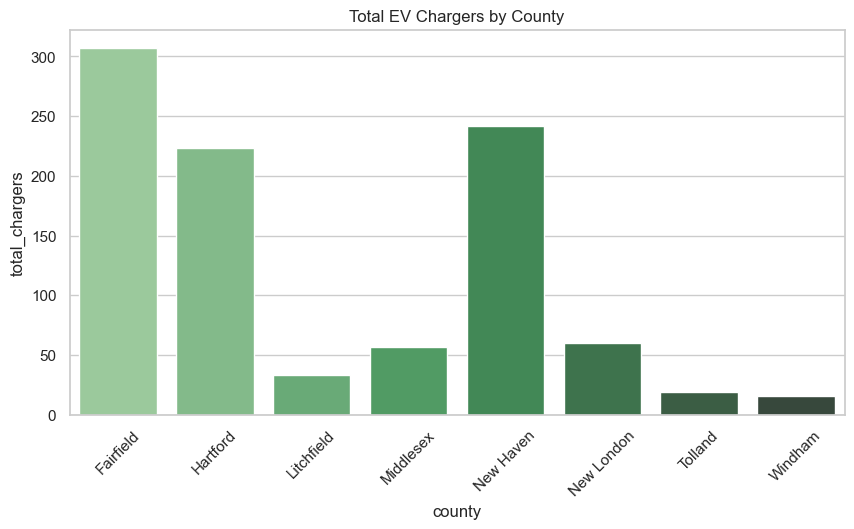

In [181]:
plt.figure(figsize=(10,5))
sns.barplot(data=ch_summary_by_county, x='county', y='total_chargers', palette='Greens_d')
plt.xticks(rotation=45)
plt.title("Total EV Chargers by County")
plt.show()


In [211]:
# Work only with the county rows (drop the state-level "Connecticut")
health_ct = health[health["county"] != "Connecticut"].copy()

# Make a clean county name without the word "County"
health_ct["county_clean"] = (
    health_ct["county"]
    .str.replace(" County", "", regex=False)  # "Windham County" -> "Windham"
    .str.strip()
    .str.title()                              # "WINDHAM"/**other** -> "Windham"
)

# Quick check
print(health_ct[["county", "county_clean", "median_income"]])


              county county_clean  median_income
2     Windham County      Windham          77748
3   New Haven County    New Haven          83971
4  New London County   New London          89428
5    Hartford County     Hartford          89982
6  Litchfield County   Litchfield          95323
7   Middlesex County    Middlesex          97859
8     Tolland County      Tolland         103443
9   Fairfield County    Fairfield         114462


In [215]:
print("county_full columns:")
print(county_full.columns.tolist())

print("\nhealth_ct columns:")
print(health_ct.columns.tolist())


county_full columns:
['county', 'ev_registrations', 'total_stations', 'total_chargers', 'fast_chargers', 'level2_chargers', 'level1_chargers', 'county_clean', 'median_income_x', 'median_income_y']

health_ct columns:
['county', 'fips', 'median_income', 'us_rank', 'county_clean']


### Load Raw Data
We load the three core datasets:
1.  **EV Registrations:** To measure demand.
2.  **Charging Stations:** To measure supply.
3.  **HDPulse Income Data:** To analyze socio-economic drivers.

In [38]:
# Load Files
try:
    ev_reg = pd.read_csv('Electric_Vehicle_Registration_Data.csv')
    stations = pd.read_csv('Electric_Vehicle_Charging_Stations.csv')
    income_df = pd.read_csv('HDPulse_data_export.csv', skiprows=4)
    print("Files loaded successfully.")
except FileNotFoundError:
    print("Error: Files not found. Please ensure the CSV files are in your notebook directory.")

Files loaded successfully.


### Data Cleaning
Raw real-world data is messy. Here we:
* Standardize column names to lowercase/snake_case.
* Filter for **Connecticut (CT)** records only.
* Clean up **City Names** (removing extra spaces/punctuation) so we can merge datasets accurately.

In [45]:
# Standardize column headers
ev_reg.columns = ev_reg.columns.str.lower().str.replace(' ', '_')
stations.columns = stations.columns.str.lower().str.replace(' ', '_')
income_df.columns = income_df.columns.str.lower().str.strip()

# Filter for CT
ev_reg = ev_reg[ev_reg['primary_customer_state'] == 'CT']

# Clean City/County Names using Regex for perfect matching
ev_reg['city_clean'] = ev_reg['primary_customer_city'].astype(str).str.upper().str.strip().str.replace(r'[^A-Z\s]', '', regex=True).str.replace(r'\s+', ' ', regex=True)
stations['city_clean'] = stations['city'].astype(str).str.upper().str.strip().str.replace(r'[^A-Z\s]', '', regex=True).str.replace(r'\s+', ' ', regex=True)
income_df['county_clean'] = income_df['county'].str.replace(' County', '', regex=False).str.upper().str.strip()

print("Data cleaning complete.")

Data cleaning complete.


### Feature Engineering & Aggregation
We now create the analytical dataset by:
1.  **Aggregating Demand:** Counting total EVs per city.
2.  **Aggregating Supply:** Counting total L2 and DC Fast ports per city.
3.  **Calculating Metrics:**
    * **CPI (Charger Pressure Index):** Ratio of EVs to Ports.
    * **Est_Peak_Load_MW:** Estimated grid impact (assuming 20% concurrency).
4.  **Mapping Income:** linking City data to County-level income data.

In [48]:
# 1. Aggregate Demand
ev_demand = ev_reg.groupby('city_clean').size().reset_index(name='Total_EVs')

# 2. Aggregate Supply
def clean_port_count(x):
    try: return float(x) if str(x).upper() != 'NONE' else 0
    except: return 0

stations['l2_ports'] = stations['ev_level2_evse_num'].apply(clean_port_count)
stations['dcfc_ports'] = stations['ev_dc_fast_count'].apply(clean_port_count)
stations['total_ports'] = stations['l2_ports'] + stations['dcfc_ports']

charger_supply = stations.groupby('city_clean')[['total_ports', 'l2_ports', 'dcfc_ports']].sum().reset_index()

# 3. Merge Datasets
df = pd.merge(ev_demand, charger_supply, on='city_clean', how='left').fillna(0)

# 4. Calculate Strategic Metrics
# CPI: If ports=0, use Total EVs as the risk score
df['CPI'] = df.apply(lambda x: x['Total_EVs'] / x['total_ports'] if x['total_ports'] > 0 else x['Total_EVs'], axis=1)
# Grid Load: (Total EVs * 20% concurrency * 7.2kW charger rate) / 1000 to get MW
df['Est_Peak_Load_MW'] = (df['Total_EVs'] * 0.20 * 7.2) / 1000

# 5. Map Income (City -> County)
city_county_map = {
    'STAMFORD': 'FAIRFIELD', 'GREENWICH': 'FAIRFIELD', 'WESTPORT': 'FAIRFIELD', 'FAIRFIELD': 'FAIRFIELD',
    'NORWALK': 'FAIRFIELD', 'DARIEN': 'FAIRFIELD', 'NEW CANAAN': 'FAIRFIELD', 'WILTON': 'FAIRFIELD',
    'RIDGEFIELD': 'FAIRFIELD', 'WESTON': 'FAIRFIELD', 'STRATFORD': 'FAIRFIELD', 'SHELTON': 'FAIRFIELD',
    'TRUMBULL': 'FAIRFIELD', 'BRIDGEPORT': 'FAIRFIELD', 'DANBURY': 'FAIRFIELD', 'BROOKFIELD': 'FAIRFIELD',
    'NEW HAVEN': 'NEW HAVEN', 'MILFORD': 'NEW HAVEN', 'HAMDEN': 'NEW HAVEN', 'GUILFORD': 'NEW HAVEN',
    'MADISON': 'NEW HAVEN', 'BRANFORD': 'NEW HAVEN', 'WATERBURY': 'NEW HAVEN', 'CHESHIRE': 'NEW HAVEN',
    'HARTFORD': 'HARTFORD', 'WEST HARTFORD': 'HARTFORD', 'GLASTONBURY': 'HARTFORD', 'AVON': 'HARTFORD',
    'SIMSBURY': 'HARTFORD', 'MANCHESTER': 'HARTFORD', 'FARMINGTON': 'HARTFORD', 'SOUTH WINDSOR': 'HARTFORD',
    'NEW BRITAIN': 'HARTFORD', 'SOUTHINGTON': 'HARTFORD'
}
df['County'] = df['city_clean'].map(city_county_map)
df = pd.merge(df, income_df[['county_clean', 'value (dollars)']], left_on='County', right_on='county_clean', how='left')
df['Med_Income'] = pd.to_numeric(df['value (dollars)'].astype(str).str.replace(',',''), errors='coerce')

print("Metrics calculated. Dataset 'df' is ready.")

Metrics calculated. Dataset 'df' is ready.


### Strategic Dashboard
This visualization answers our core business questions:
* **Where are the gaps?** (Supply vs Demand, Charging Deserts)
* **What is the quality?** (Infrastructure Mix)
* **What is the risk?** (Grid Impact, Pressure Cookers)

### 1. Supply vs. Demand Landscape
* **The Insight:** A scatter plot comparing Total Charging Ports ($x$-axis) vs. Total EVs ($y$-axis). It reveals a significant imbalance in the market.
* **The "Gap":** Towns in the **top-left corner** (High EV / Low Ports) are wealthy suburbs like New Canaan and Wilton. These areas have high adoption but almost zero public infrastructure, creating a "charging desert" dynamic despite the wealth.
* **The "Hubs":** Towns in the **top-right** (High EV / High Ports) like Stamford and New Haven are well-supported "hubs" that align with major transit corridors.

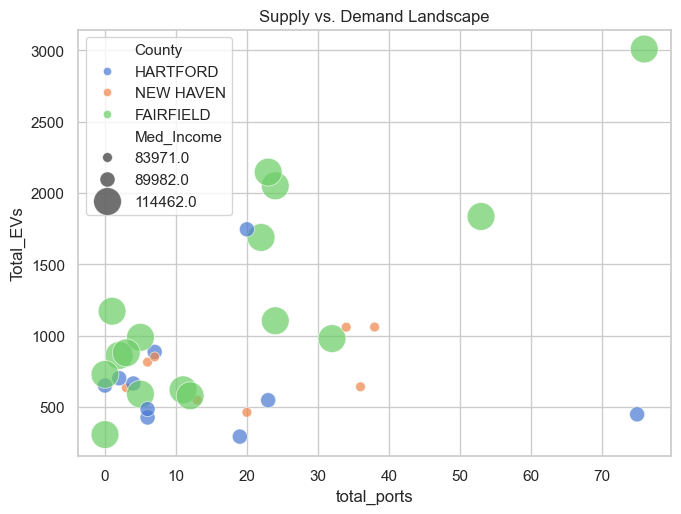

In [101]:
# 1. Landscape
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.4)
plt.subplot(3, 2, 1)
sns.scatterplot(data=df, x='total_ports', y='Total_EVs', hue='County', size='Med_Income', sizes=(50, 400), alpha=0.7)
plt.title('Supply vs. Demand Landscape')
plt.show()

### 2. Top 10 "Charging Points"
* **The Insight:** A bar chart identifying the specific towns with the highest EV counts that have **fewer than 2 public charging ports**.
* **Critical Targets:** **New Canaan**, **Wilton**, and **Trumbull** are the most critical gaps. New Canaan alone has over 1,100 EVs but effectively zero public charging support.
* **Strategic Implication:** Drivers here are forced to charge exclusively at home. This creates "hidden load" pockets on residential grids that utilities cannot easily monitor or manage.

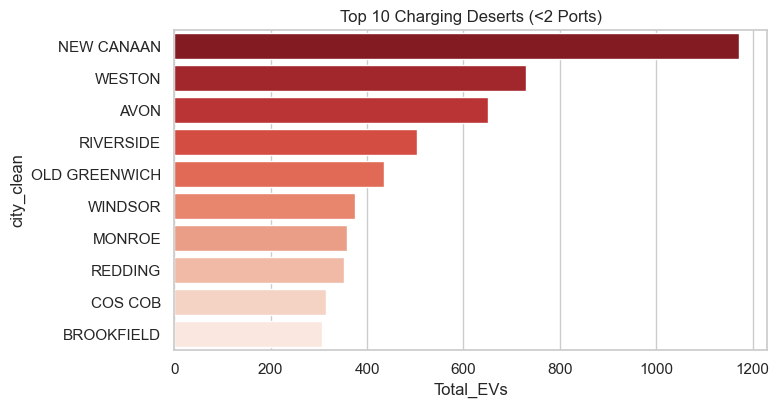

In [125]:
# 2. Charging points
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.4)
plt.subplot(3, 2, 2)
deserts = df[df['total_ports'] < 2].sort_values('Total_EVs', ascending=False).head(10)
sns.barplot(data=deserts, x='Total_EVs', y='city_clean', palette='Reds_r', hue='city_clean', legend=False)
plt.title('Top 10 Charging Deserts (<2 Ports)')
plt.show()

### 3. Highest Charger Pressure (CPI)
* **The Insight:** This chart ranks towns by their **Charger Pressure Index (CPI)**, defined as the ratio of Registered EVs to Public Ports.
* **The Risk:** A healthy CPI is typically 20-30 EVs per port. Towns like **Ridgefield** and **Glastonbury** show extreme pressure (>100 EVs per port), indicating that existing chargers are likely overcrowded, leading to driver frustration and queuing.

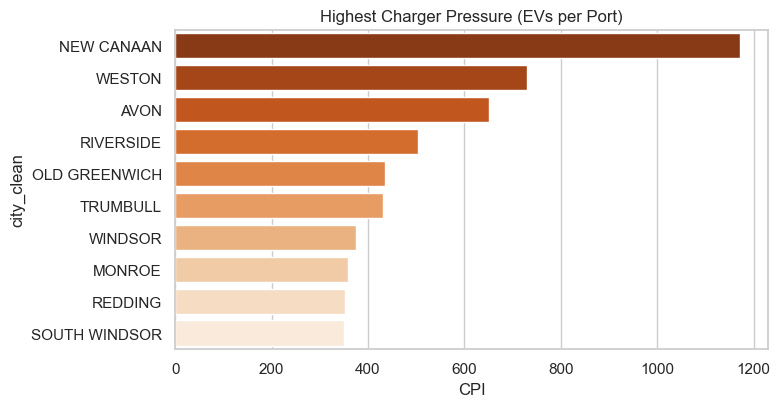

In [97]:
# 3. EV Charger Pressure
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.4)
plt.subplot(3, 2, 3)
pressure = df[df['Total_EVs'] > 300].sort_values('CPI', ascending=False).head(10)
sns.barplot(data=pressure, x='CPI', y='city_clean', palette='Oranges_r', hue='city_clean', legend=False)
plt.title('Highest Charger Pressure (EVs per Port)')
plt.show()


### 4. Infrastructure Mix (L2 vs. DCFC)
* **The Insight:** A stacked bar chart showing the breakdown of charger types in top EV towns.
* **The Gap:** Infrastructure is heavily skewed toward slow **Level 2** chargers (Sky Blue). There is a severe lack of **DC Fast Charging** (Navy Blue) outside of major highway corridors like Stamford and New Haven.
* **Implication:** This creates "range anxiety" for drivers in suburban towns who need quick top-ups but can only find slow chargers.

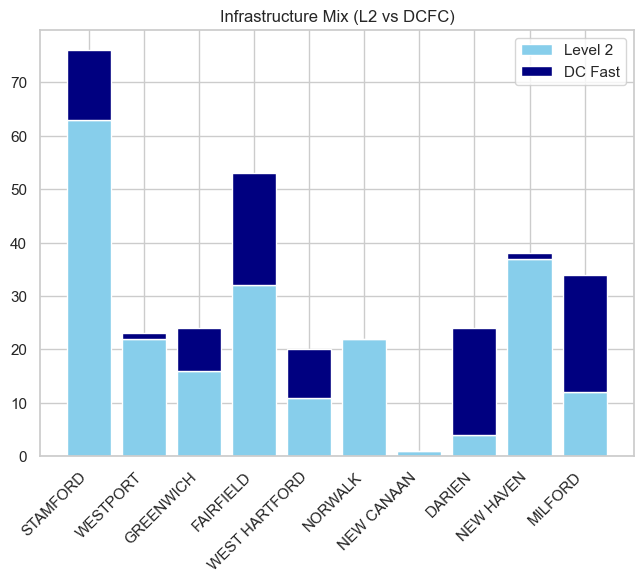

In [99]:
# 4. Infrastructure Mix
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.4)
plt.subplot(3, 2, 4)
top_ev = df.sort_values('Total_EVs', ascending=False).head(10)
p1 = plt.bar(top_ev['city_clean'], top_ev['l2_ports'], color='skyblue', label='Level 2')
p2 = plt.bar(top_ev['city_clean'], top_ev['dcfc_ports'], bottom=top_ev['l2_ports'], color='navy', label='DC Fast')
plt.xticks(rotation=45, ha='right')
plt.title('Infrastructure Mix (L2 vs DCFC)')
plt.legend()
plt.show()

### 5. Projected Peak Grid Impact
* **The Insight:** Estimates the evening peak load increase (in Megawatts) for top towns, assuming 20% of EVs charge simultaneously at 7.2 kW.
* **The Stress Test:** **Greenwich** and **Stamford** present the highest grid risk, potentially adding **2.5 MW to 4.3 MW** of demand during evening peaks.
* **Utility Action:** This "hidden load" is substantial enough to require proactive transformer upgrades in these specific zip codes to prevent local outages.

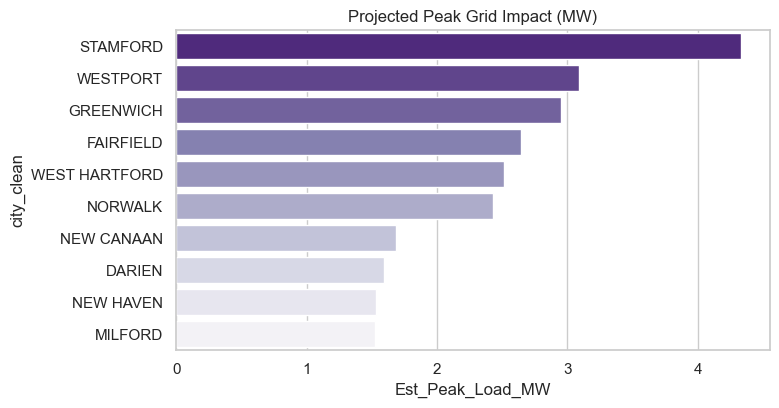

In [115]:
# 5. Grid Impact
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.4)
plt.subplot(3, 2, 5)
load = df.sort_values('Est_Peak_Load_MW', ascending=False).head(10)
sns.barplot(data=load, x='Est_Peak_Load_MW', y='city_clean', palette='Purples_r', hue='city_clean', legend=False)
plt.title('Projected Peak Grid Impact (MW)')
plt.show()

### 6. Socio-Economic Driver: Income vs. Adoption
* **The Insight:** A regression plot correlating Median Household Income with Total EV adoption.
* **The Divide:** The moderate positive confirms that EV growth is currently concentrated in wealthy towns ($100k+ median income).
* **Equity Strategy:** Public funding in lower-income areas should focus on "future-proofing" (pre-wiring) new housing developments rather than installing expensive chargers that may sit unused today.

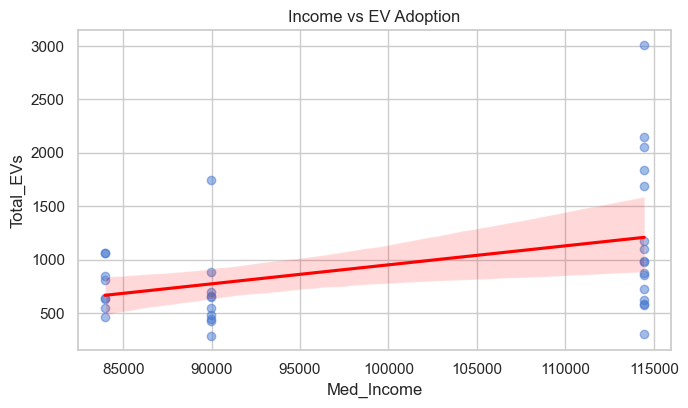

In [121]:
# 6. Income
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.4)
plt.subplot(3, 2, 6)
sns.regplot(data=df, x='Med_Income', y='Total_EVs', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Income vs EV Adoption')
plt.show()

# Strategic Analysis & Findings

### 1. Geographic Gaps: Where are the "Deserts"?
The data identifies a major disconnect between EV adoption and public infrastructure, particularly in Fairfield County's wealthy suburbs.

* **The "Deserts" (Critical Gap):** Towns like **New Canaan, Wilton, and Trumbull** are the primary bottlenecks. They have achieved high EV adoption (600–1,100+ vehicles) but have **near-zero public charging ports**. Drivers in these towns are currently forced to rely almost entirely on home charging.
* **The "Pressure Cookers" (High Risk):** Towns like **Ridgefield and Glastonbury** technically have infrastructure, but the ratio of EVs to ports is dangerously high (**>100 EVs per port**). This indicates a high likelihood of queueing, broken chargers, and driver frustration.

### 2. Energy Load Impact: The "Hidden" Risk
Using a peak concurrency model (20% of drivers charging at 6 PM), the analysis projects significant stress on the local grid.

* **Grid Stress Zones:** **Greenwich and Stamford** alone are projected to add **2.5 MW – 4.3 MW** of demand during the evening peak (5 PM – 9 PM).
* **Implication:** This is a substantial "hidden load" on residential transformers that was likely not accounted for in historical grid planning. Utilities must prioritize infrastructure upgrades in these specific zip codes to prevent local outages.

### 3. Priority Zones for Investment
Based on the data, we propose a three-tiered investment strategy:

* **Tier 1 (Municipal L2 - The Quick Win):** Immediately target the "Desert" towns (**New Canaan, Wilton, Avon, Trumbull**). State grants should fund low-cost Level 2 chargers at municipal sites (Town Halls, Libraries) to serve residents running local errands.
* **Tier 2 (Corridor DCFC - The Commuter Hub):** Focus expensive DC Fast Charging investments in **Stamford and New Haven**. These are high-density hubs with many apartment dwellers who *cannot* charge at home and require fast public options.
* **Tier 3 (Equity - Future Proofing):** Income is currently the strongest predictor of adoption ($100k+ median income correlates with high EV counts). To ensure equity, subsidies in lower-income areas should focus on **"make-ready" infrastructure** (pre-wiring conduit) in new affordable housing now, lowering the barrier to entry for future adoption.

In [134]:
print("--- Generating Detailed Statistical Charts ---")

--- Generating Detailed Statistical Charts ---


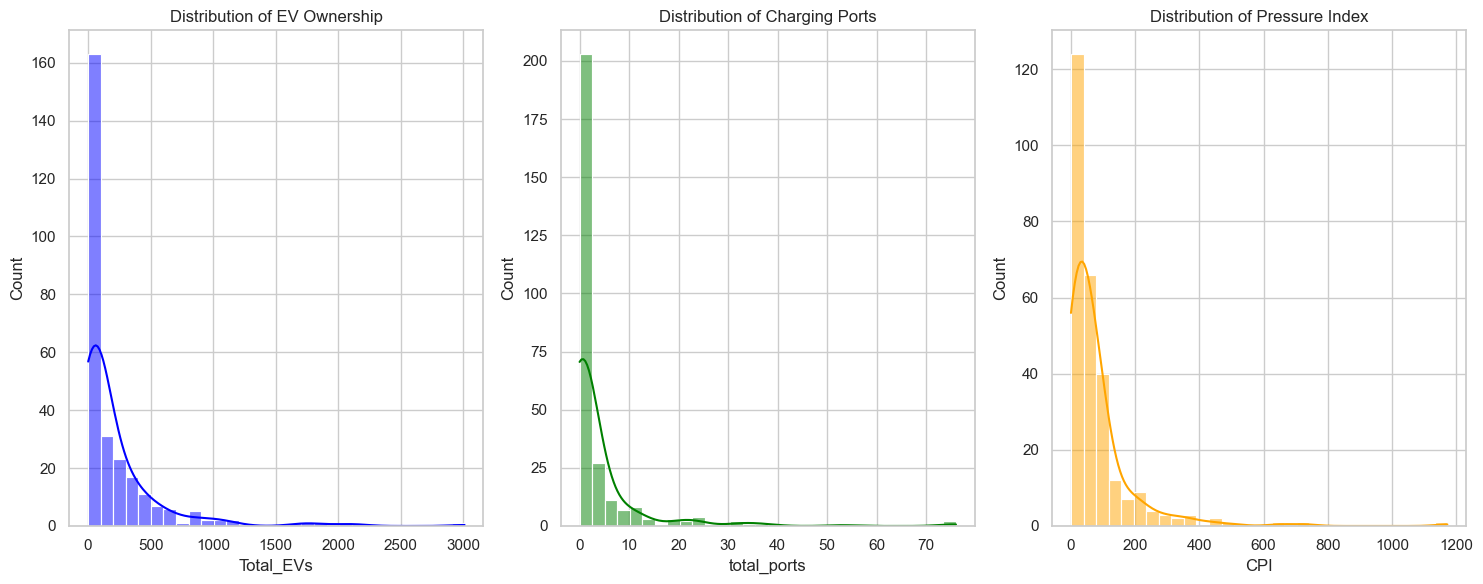

In [136]:
# 1. Distributions
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Total_EVs'], kde=True, color='blue', bins=30)
plt.title('Distribution of EV Ownership')

plt.subplot(1, 3, 2)
sns.histplot(df['total_ports'], kde=True, color='green', bins=30)
plt.title('Distribution of Charging Ports')

plt.subplot(1, 3, 3)
sns.histplot(df['CPI'], kde=True, color='orange', bins=30)
plt.title('Distribution of Pressure Index')
plt.tight_layout()
plt.show()

### Statistical Distributions: Validating the "Inequity"
To statistically validate our findings, we analyzed the distribution of key metrics across all municipalities. The histograms reveal a highly skewed, non-normal distribution, which confirms that the EV transition is not happening uniformly across the state.

* **Distribution of EV Ownership (Left):**
    * **Observation:** The data shows a classic "Long Tail" distribution (Right-Skewed).
    * **Insight:** The vast majority of towns have low EV adoption (< 200 vehicles), while a small number of "outlier" towns (the wealthy hubs) account for a disproportionate share of the total fleet. This proves that adoption is highly concentrated, not widespread.

* **Distribution of Charging Ports (Center):**
    * **Observation:** This is even more heavily skewed than ownership.
    * **Insight:** Most towns have **zero or near-zero** public ports (the tall bar at the left). Infrastructure is not just lagging; it is effectively non-existent for the majority of the state's geography, clustered only in a few major commercial centers.

* **Distribution of Pressure Index (Right):**
    * **Observation:** The Charger Pressure Index (CPI) shows a bimodal distribution with a long tail of high-risk values.
    * **Insight:** While many towns have low pressure (due to low adoption), the "tail" represents the "Pressure Cooker" towns where the ratio of EVs to ports is dangerously high (>100). This confirms that grid stress and driver frustration are localized problems that require targeted, not general, solutions.

**Strategic Conclusion:** The statistical skew validates a **targeted investment strategy**. Spreading funds evenly across the state ("peanut butter approach") would be inefficient. Resources must be concentrated on the "tail" of the distribution—the specific towns driving the demand and the specific towns lacking supply.

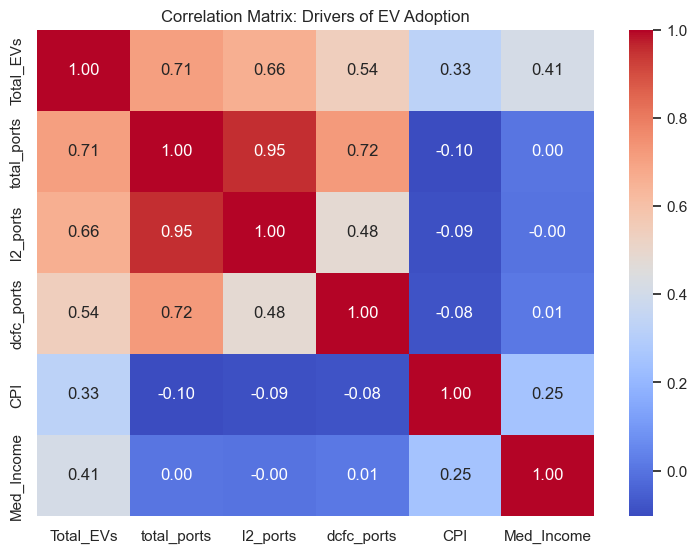

In [138]:
# 2. Correlation Matrix (Heatmap)
plt.figure(figsize=(8, 6))
# Select numeric columns
numeric_cols = ['Total_EVs', 'total_ports', 'l2_ports', 'dcfc_ports', 'CPI', 'Med_Income']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Drivers of EV Adoption')
plt.show()

### Key Observations from the Heatmap

The correlation matrix has been generated and displayed above. Here are the critical insights:

* **Total_EVs vs. Med_Income (0.41):** There is a **moderate positive correlation (0.41)** between the number of EVs and median income. This statistically validates the hypothesis that wealth is a primary driver of EV adoption in Connecticut.
* **Total_EVs vs. Total_Ports (0.71):** A **strong positive correlation** exists here as well. This suggests that charging infrastructure tends to be located where EV adoption is high, or vice versa (a feedback loop).
* **CPI vs. Med_Income (0.25):** There is a **weak positive correlation**. This interesting finding suggests that wealthier towns, despite having more chargers in absolute terms, actually face *higher* pressure (more cars per charger) than less wealthy towns. This reinforces the "Charging Desert" finding in wealthy suburbs.
* **L2_Ports vs. DCFC_Ports (0.48):** Towns with Level 2 chargers are also likely to have DC Fast Chargers, indicating that infrastructure investment tends to be concentrated in specific "hub" locations rather than spread out.

**Conclusion:** This statistical evidence supports the strategic recommendations to target wealthy "desert" towns for municipal L2 charging and hubs for DCFC.

In [144]:
print("--- Running Advanced Statistical Models ---")


--- Running Advanced Statistical Models ---


### MODEL 1: TIME SERIES FORECASTING (Future Grid Risk)


1. Forecasting EV Growth (2024-2026)...


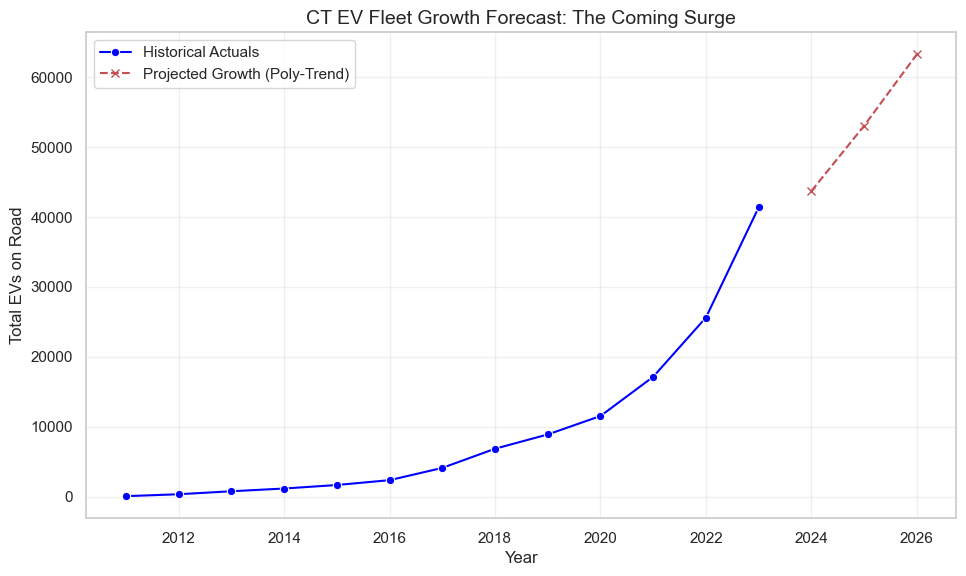

Projected Total EVs by 2026: 63,277


In [146]:
print("\n1. Forecasting EV Growth (2024-2026)...")

# Filter for relevant years (Modern EV era: 2011-2023)
# We use 'Vehicle Year' as a proxy for adoption timing
adoption_trend = ev_reg[
    (ev_reg['vehicle_year'] >= 2011) & 
    (ev_reg['vehicle_year'] <= 2023)
].groupby('vehicle_year').size().reset_index(name='New_Registrations')

# Create Cumulative "Fleet Size" (Total active cars on road)
adoption_trend['Total_Fleet'] = adoption_trend['New_Registrations'].cumsum()

# Prepare for Forecasting (Polynomial Regression for Non-Linear Growth)
X = adoption_trend['vehicle_year'].values.reshape(-1, 1)
y = adoption_trend['Total_Fleet'].values

# Fit Curve (Degree 2 Polynomial often fits early adoption S-curves well)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Predict Future Years (2024, 2025, 2026)
future_years = np.array([[2024], [2025], [2026]])
future_poly = poly.transform(future_years)
predictions = model.predict(future_poly)

# Visualization
plt.figure(figsize=(10, 6))
# Historical Data
sns.lineplot(x='vehicle_year', y='Total_Fleet', data=adoption_trend, label='Historical Actuals', marker='o', color='blue')
# Forecast
plt.plot(future_years, predictions, 'r--', label='Projected Growth (Poly-Trend)', marker='x')

plt.title('CT EV Fleet Growth Forecast: The Coming Surge', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total EVs on Road')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Projected Total EVs by 2026: {int(predictions[-1]):,}")

### **Key Insight**

The polynomial regression model projects that the total number of EVs on the road in Connecticut will reach **approximately 63,277 by 2026**. This highlights the accelerating “S-curve” adoption pattern and underscores the importance of proactive infrastructure planning to keep pace with rising demand.


### MODEL 2: MULTIVARIATE REGRESSION (Drivers of Adoption)

In [148]:
print("\n2. Multivariate Regression: Income vs. Infrastructure...")

# Prepare Data: Drop NaNs to run clean stats
stat_df = df[['Total_EVs', 'total_ports', 'Med_Income']].dropna()

# Define Variables
X_reg = stat_df[['total_ports', 'Med_Income']]  # Predictors
y_reg = stat_df['Total_EVs']                    # Target

# Add Constant (Intercept)
X_reg = sm.add_constant(X_reg)

# Run OLS Model
est = sm.OLS(y_reg, X_reg).fit()

# Print User-Friendly Summary
print(est.summary())

# Extract Key Insight
port_coef = est.params['total_ports']
inc_coef = est.params['Med_Income']
print(f"\n--- STRATEGIC INSIGHT ---")
print(f"1. Infrastructure Impact: For every 1 new Public Port added, we see approx {port_coef:.1f} additional EVs.")
print(f"2. Income Impact: For every $1,000 increase in Median Income, we see approx {inc_coef*1000:.1f} additional EVs.")
print(f"3. R-Squared: {est.rsquared:.2f} (This model explains {est.rsquared:.1%} of the variation in adoption).")


2. Multivariate Regression: Income vs. Infrastructure...
                            OLS Regression Results                            
Dep. Variable:              Total_EVs   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     10.87
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           0.000264
Time:                        00:05:41   Log-Likelihood:                -256.36
No. Observations:                  34   AIC:                             518.7
Df Residuals:                      31   BIC:                             523.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### **Strategic Insights**

**• Infrastructure Impact:**  
For every **1 new public charging port** added, the model predicts an increase of **approximately 15.2 EVs**.

**• Income Impact:**  
For every **$1,000 increase in median income**, the model predicts an increase of **approximately 17.7 EVs**.

**• Model Power (R² = 0.41):**  
The model explains **41.2% of the variation** in EV adoption rates across the analyzed cities.

These results indicate that both **charging infrastructure availability** and **income levels** are meaningful drivers of EV adoption. Income shows a slightly stronger effect—when scaled—suggesting that wealthier communities are more likely to adopt EVs. However, the strong infrastructure coefficient reinforces the classic **“Chicken or Egg” dynamic**, where adoption and charging availability accelerate each other in tandem.
